# Forecasts and Predictions

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
In order to fight churn, it has digitized a number of its customer profiles. Our task is to analyze them and come up with a customer retention strategy.

Project objectives:
- Predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
 - Identify target groups
 - Suggest measures to cut churn
 - Describe any other patterns you see with respect to interaction with customers

## Description of the data

The dataset  `gym_churn_us` is provided by Model Fitness. It is containing data on churn for a given month and information on the month preceding it. 

- 'Churn' — the fact of churn for the month in question

Current dataset fields:

User data for the preceding month:

- 'gender'

- 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located

- 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)

- 'Promo_friends' — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)

- 'Phone' — whether the user provided their phone number

- 'Age'

- 'Lifetime' — the time (in months) since the customer first came to the gym


Data from the log of visits and purchases and data on current membership status:

- 'Contract_period' — 1 month, 3 months, 6 months, or 1 year

- 'Month_to_end_contract' — the months remaining until the contract expires

- 'Group_visits' — whether the user takes part in group sessions

- 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime

- 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month

- 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, 
cosmetics, massages, etc.

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

## 1. Exploratory data analysis

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

### 1.1 Looking at the dataset

In [4]:
gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [5]:
gym.duplicated().sum()

0

In [6]:
gym.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


We got a good dataset as there are no missing values and no duplicates, but let's make the column names python friendly

In [7]:
gym.columns = gym.columns.str.lower()

In [8]:
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Great, now we can proceed for further analysis

### 1.2 Looking at the mean feature values for those who left (churn) and for those who stayed 

In [9]:
gym['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [10]:
1061 / 4000 * 100

26.525

26.5% of the members churned

In [11]:
gym.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


Taking a quick look at this simple table, it's clear that there are some major differences between the folks who stuck around and those who decided to move on.

The ones who stayed are more likely to:

- Live closer to the gym, keeping it convenient.
- Work for a partner company, enjoying those sweet perks.
- Join up with a friend's recommendation, because friends make everything better.
- Choose longer contract periods, in it for the long haul.
- Show up for those group sessions, getting their fitness on together.
- Splurge a bit more on those fancy gym extras.
- Stick around the gym for a good while, building a fitness home.

### 1.3 Plotting bar histograms and feature distributions for those who left (churn) and those who stayed

In [12]:
churned = gym[gym['churn'] == 1] 
stayed = gym[gym['churn'] == 0]

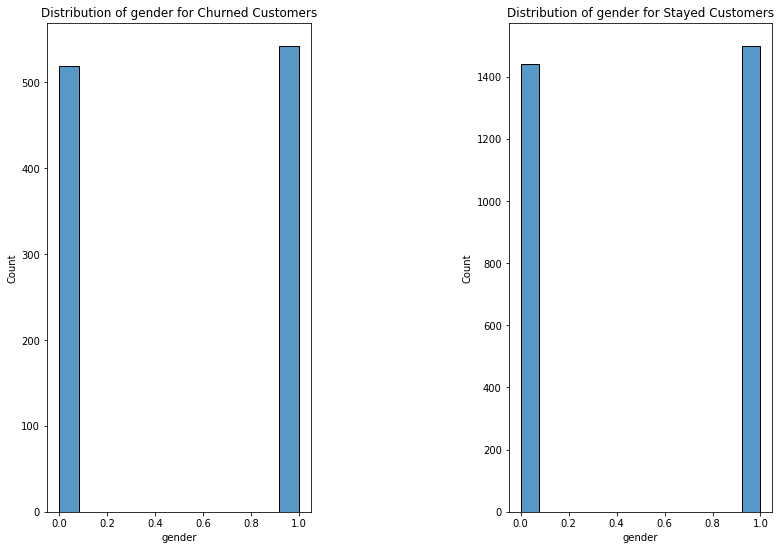

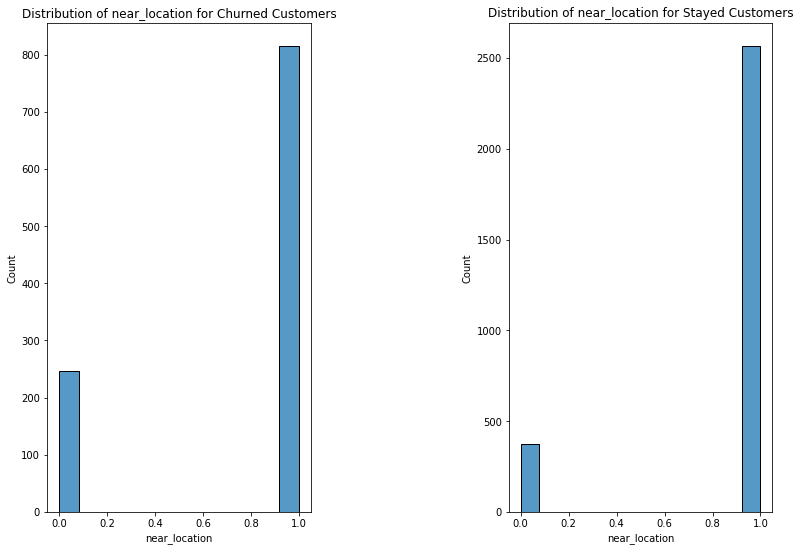

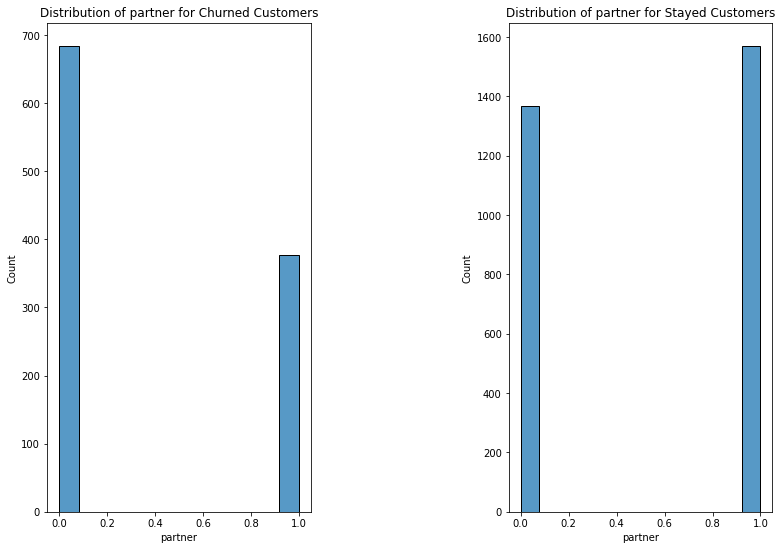

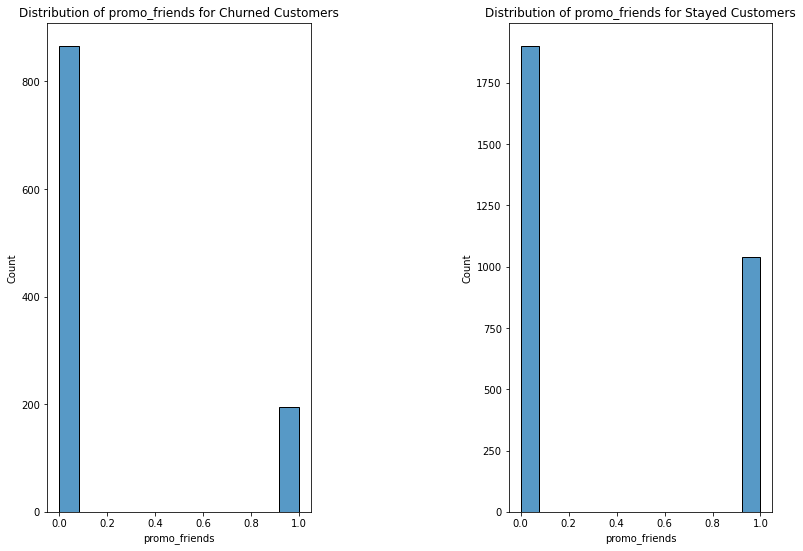

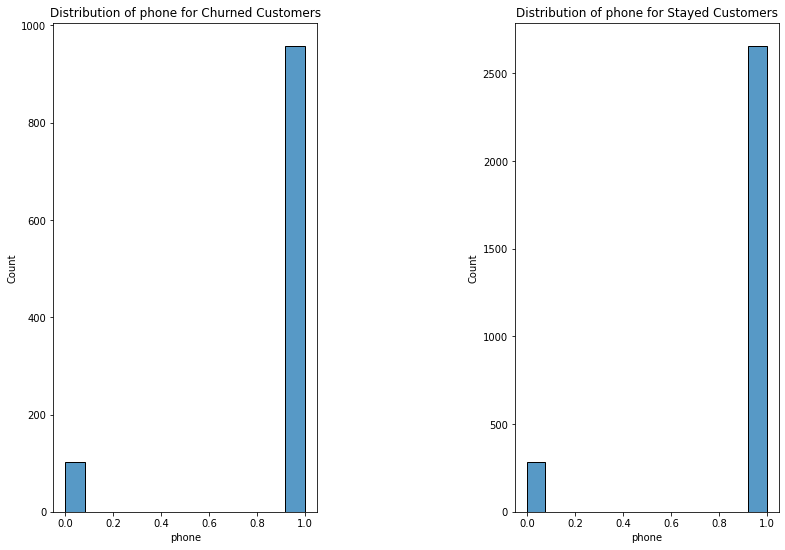

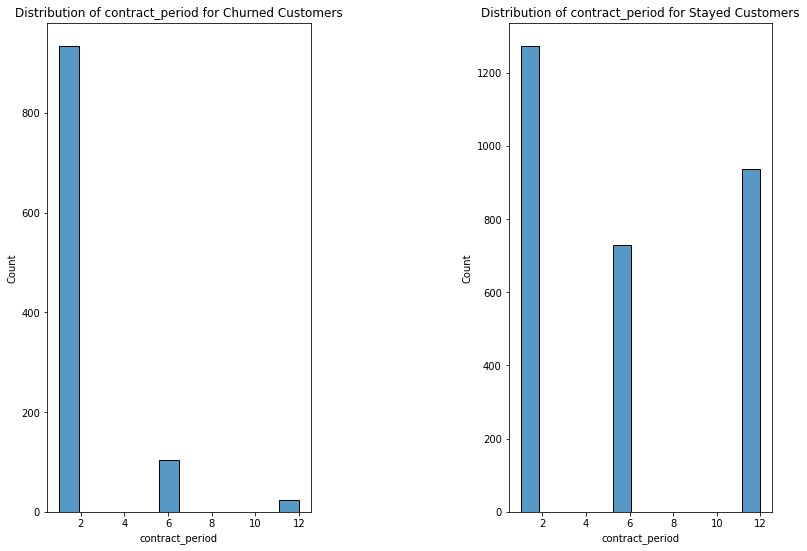

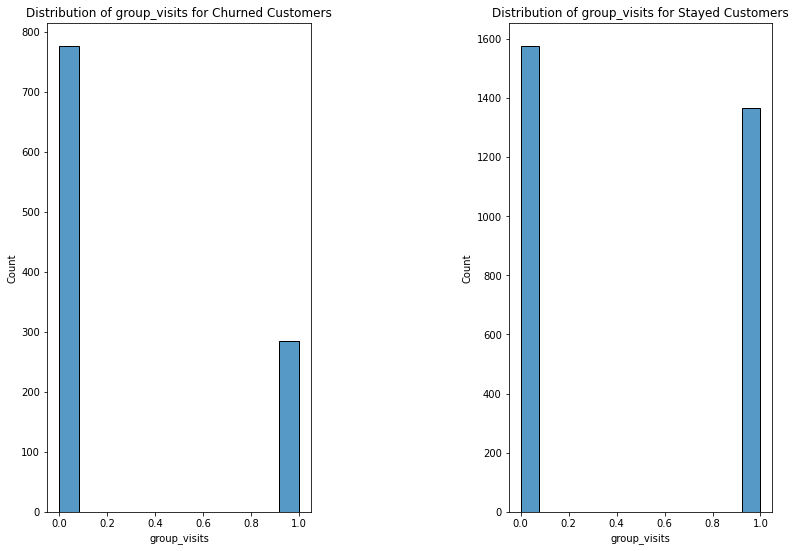

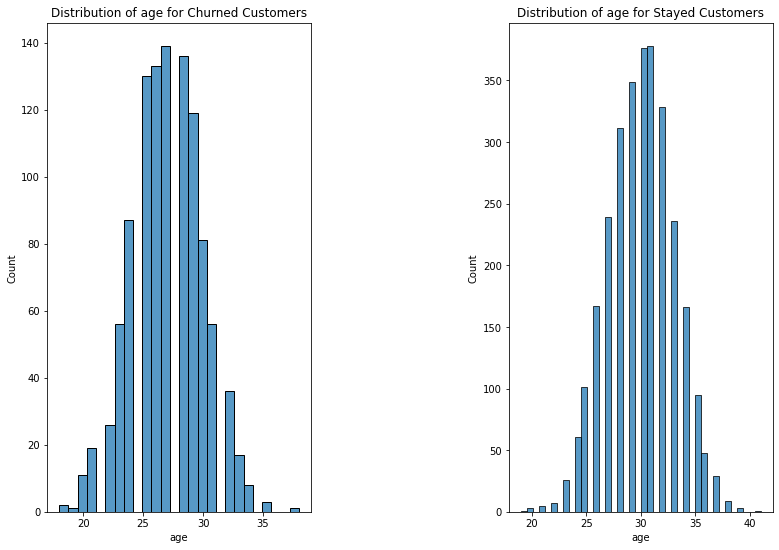

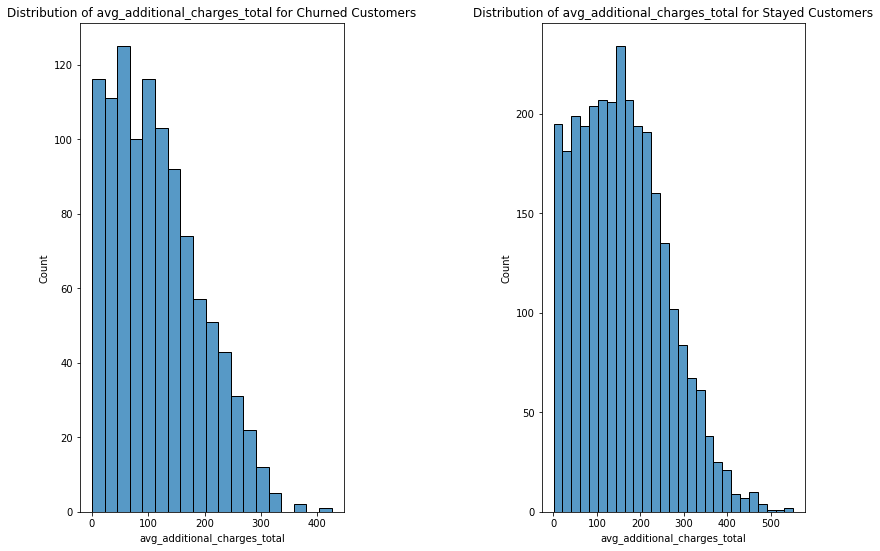

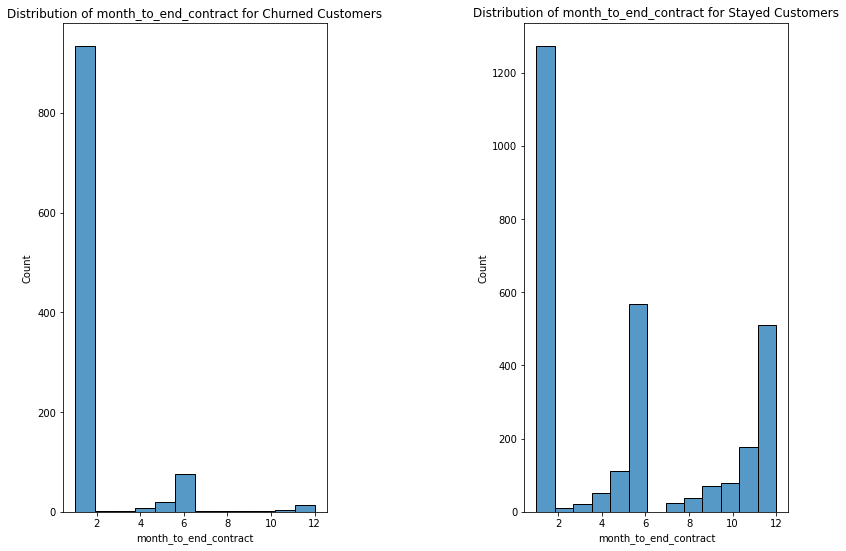

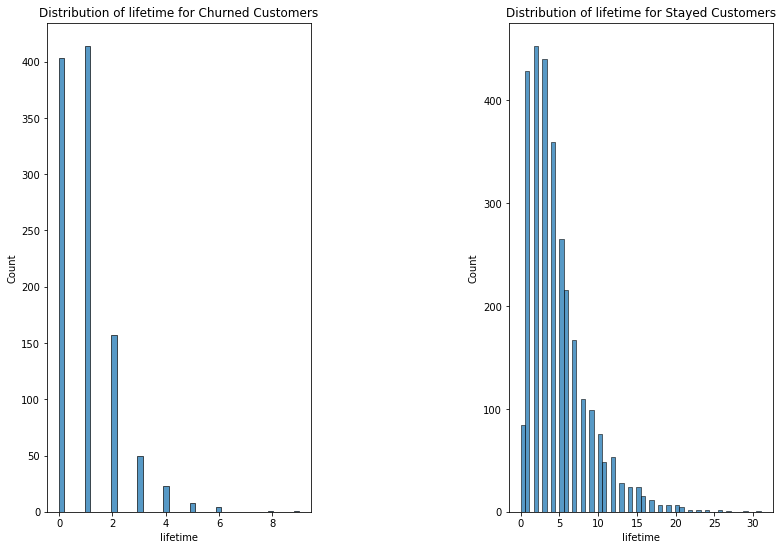

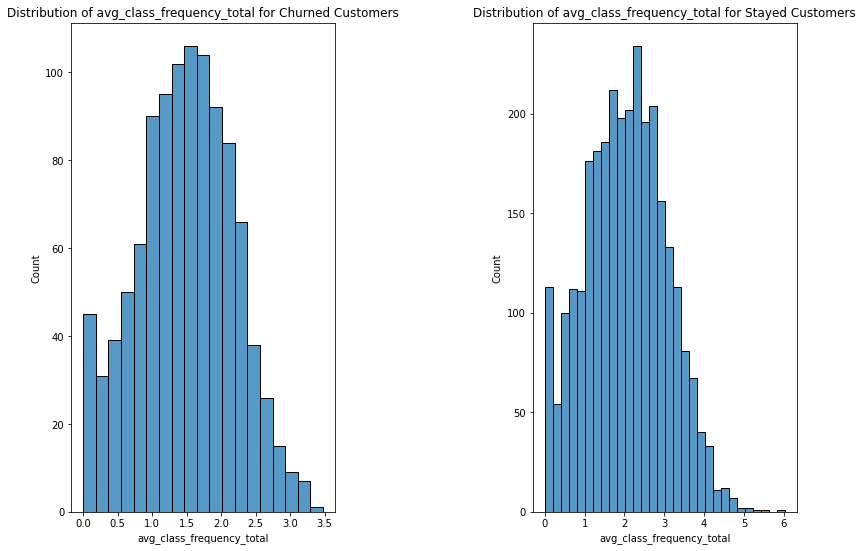

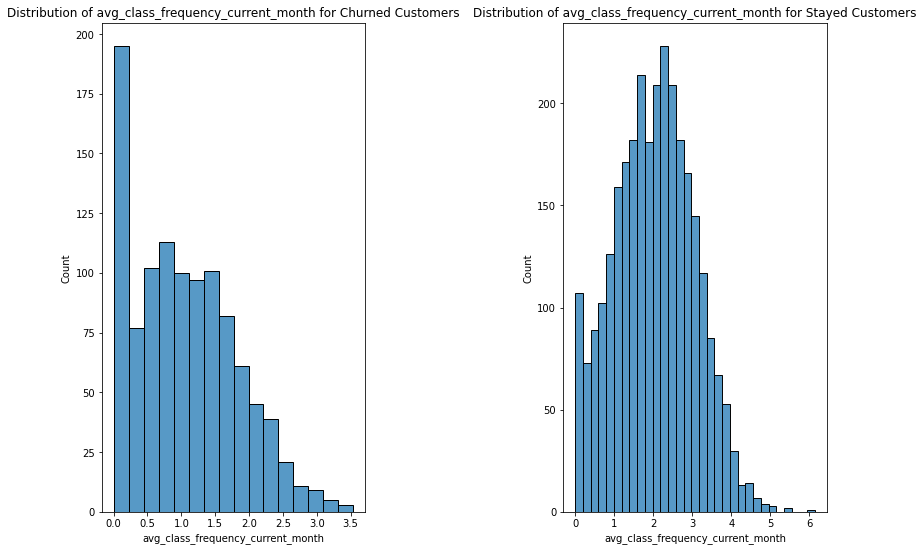

In [13]:
for var in gym.columns:
    if var != 'churn':
        plt.figure(figsize=(13, 9))
        plt.subplot(1, 2, 1)
        sns.histplot(data=churned, x=var, kde=False, label='Churned')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title(f'Distribution of {var} for Churned Customers')
        
        plt.subplot(1, 2, 2)
        sns.histplot(data=stayed, x=var, kde=False, label='Stayed')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title(f'Distribution of {var} for Stayed Customers')
        plt.subplots_adjust(wspace=0.75);

The plots give us a glimpse into how churned customers and staying customers view their gym experience:

For churned customers, even though they live nearby, they're less likely to work for a partner company or have signed up through a friend, which means they probably miss out on group sessions. They usually have shorter contracts, mostly just one month, and don't stay at the gym for long. On average, they attend only about three classes.

On the other hand, staying customers also live close to the gym. Many of them have jobs at partner companies, and around half of them signed up through a friend. They have a range of contract durations, and almost half of them enjoy group sessions. They invest more in additional gym features and attend more classes.

### 1.4 Building a correlation matrix

In [14]:
corr_m = gym.corr()

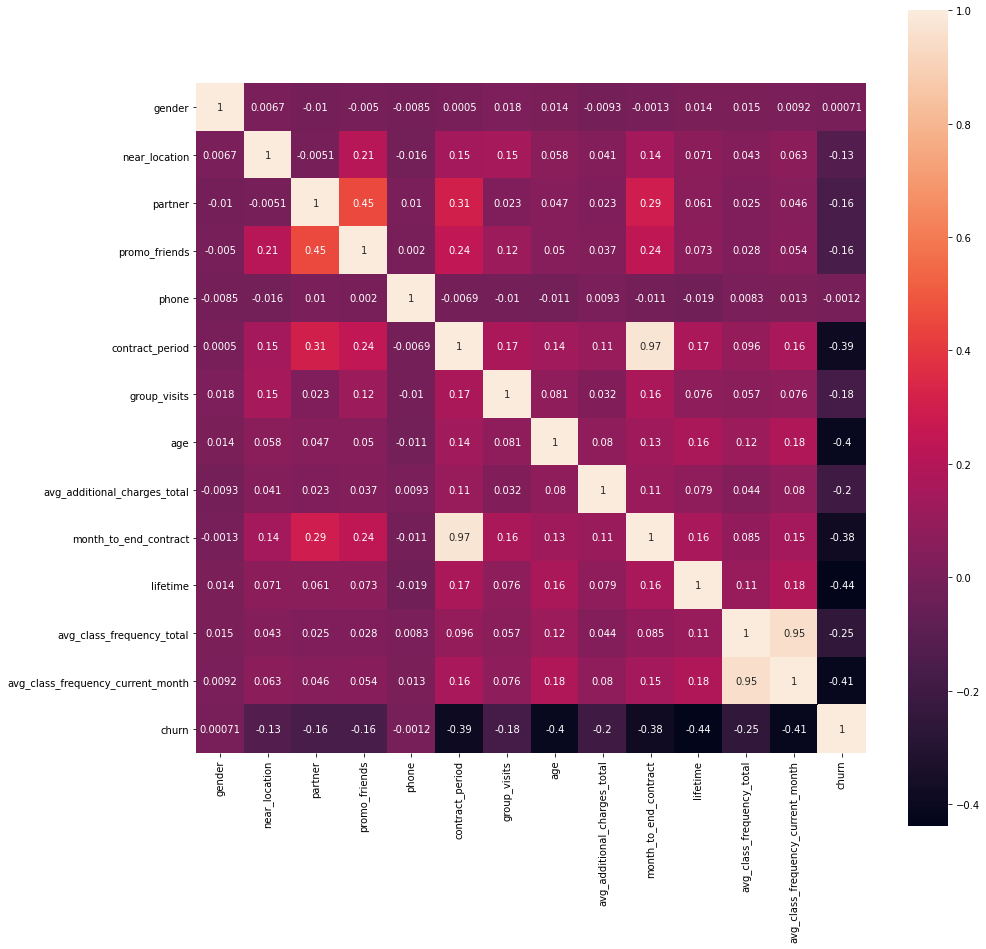

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_m, square=True, annot=True);

The correlation matrix indicates a strong relationship between 'contact_period' and 'month_to_end_contract', as well as between 'avg_class_frequency_total' and 'avg_class_frequency_current_month'. To ensure a smoother experience, we should remove one variable from each pair.

In [16]:
 gym= gym.drop(columns=['month_to_end_contract','avg_class_frequency_current_month'], axis=1)

In [17]:
gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total',
       'churn'],
      dtype='object')

## 2. Building a binary classification model to predict user churn

### 2.1 Dividing the data into train and validation sets

In [18]:
X = gym.drop('churn', axis = 1)
y = gym['churn']

# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2.2 Training the model on the train set

In [19]:
lr_model = LogisticRegression(random_state=0, max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [20]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### 2.3 Evaluating accuracy, precision, and recall for both models using the validation data

In [21]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [22]:
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]
# print all metrics
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')

Metrics for logistic regression:
	Accuracy: 0.90
	Precision: 0.78
	Recall: 0.81


In [23]:
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
# print all metrics
print_all_metrics(y_test, rf_predictions, rf_probabilities, title='Metrics for random forest:')

Metrics for random forest:
	Accuracy: 0.89
	Precision: 0.78
	Recall: 0.77


When comparing the logistic regression and random forest models, here's what we found:

The logistic regression model had an accuracy of 90%, meaning it got it right most of the time. It had a precision of 78%, which means when it said a customer would churn, it was usually right. The model also had a recall of 81%, capturing a good portion of the actual churned customers.

The random forest model had a slightly lower accuracy of 89%, still pretty good. Its precision was also 78%, so it had a similar ability to predict churn accurately. The recall was 77%, capturing a decent number of churned customers.

Overall, both models performed well, but the logistic regression model had a slight edge with higher accuracy and recall.

## 3. Creating user clusters

### 3.1 Standardizing the data

In [24]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### 3.2  Plotting a dendrogram

In [25]:
linked = linkage(X_sc, method = 'ward')

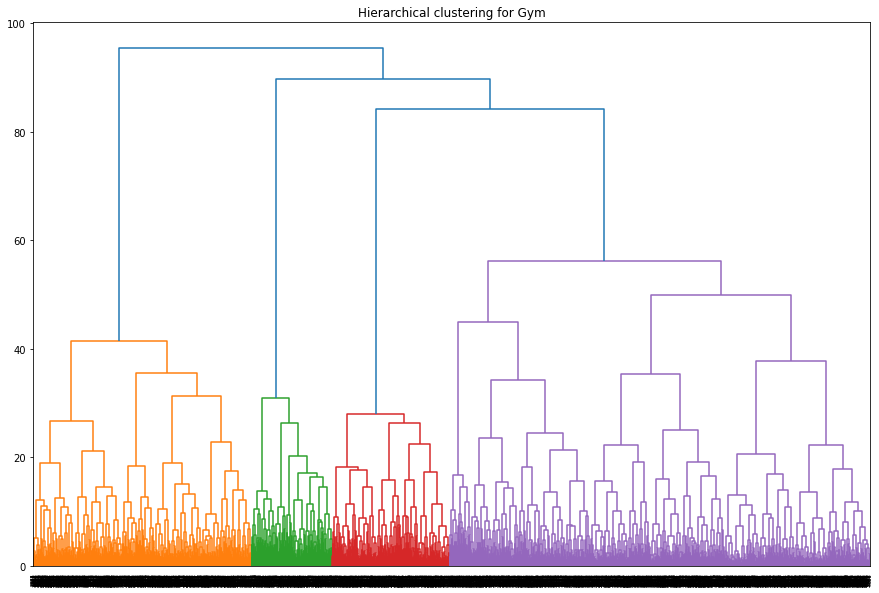

In [26]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for Gym');

### 3.3 Training the clustering model with the K-means algorithm

In [27]:
km = KMeans(n_clusters = 5)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(X_sc)

# store cluster labels in the field of our dataset
gym['cluster_km'] = labels

### 3.4 Looking at the mean feature values for clusters

In [28]:
# get the statistics of the mean feature values per cluster
gym.groupby(['cluster_km']).mean().T

cluster_km,0,1,2,3,4
gender,0.524798,0.500898,0.510050,0.497992,0.523316
near_location,0.995386,0.000000,1.000000,0.994980,0.862694
partner,0.437140,0.488330,0.187605,0.893574,0.471503
promo_friends,0.011534,0.077199,0.056114,1.000000,0.305699
phone,1.000000,1.000000,1.000000,1.000000,0.000000
contract_period,6.993080,2.978456,1.945561,6.863454,4.777202
group_visits,0.529412,0.231598,0.316583,0.520080,0.427461
age,30.761246,28.685817,27.943049,29.534137,29.297927
avg_additional_charges_total,179.277053,137.277472,124.326285,152.377724,144.208179
lifetime,5.758939,2.978456,2.107203,4.226908,3.940415


In [29]:
gym['cluster_km'].value_counts(ascending=False)

2    1194
3     996
0     867
1     557
4     386
Name: cluster_km, dtype: int64

A quick peek at the data shows that Cluster #2 has the most people in it. Interestingly, this cluster has the lowest average values for almost all the features but a surprisingly high churn rate of 0.5!

On the flip side, Cluster #4 is rocking the charts with the highest scores in all the features and a super low churn rate, not even close to 0.1.

Let's dig deeper into these clusters and see what more we can find!

### 3.5 Plotting distributions of features for the clusters

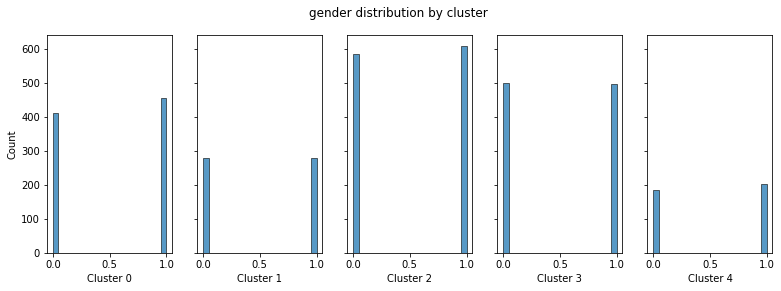

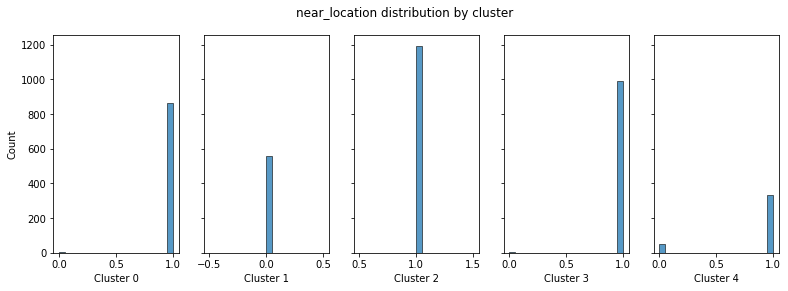

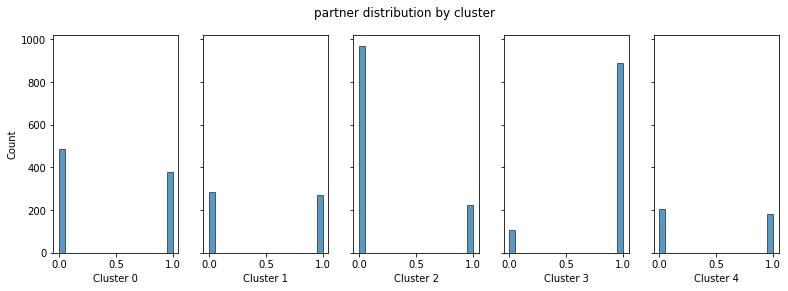

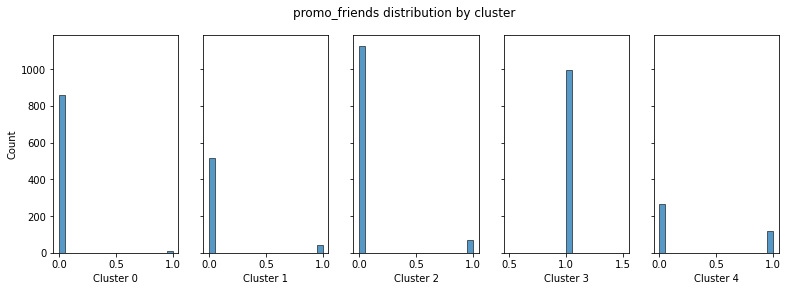

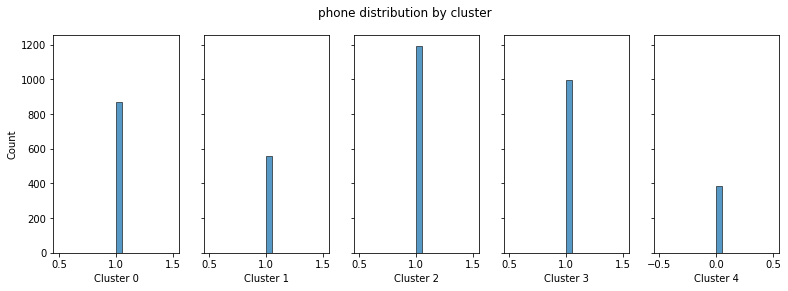

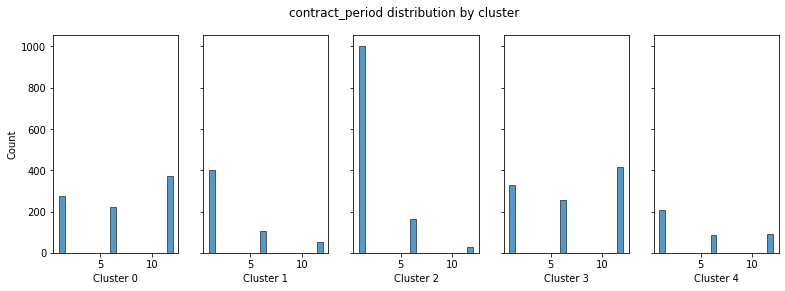

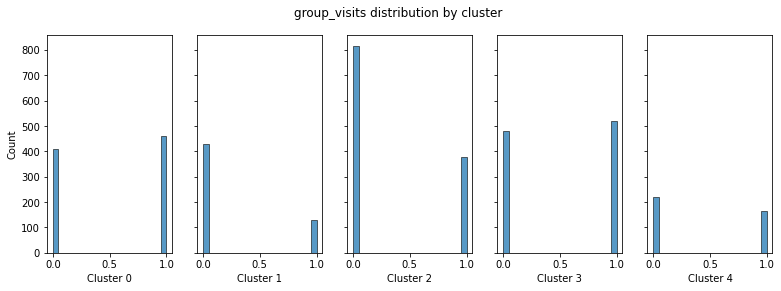

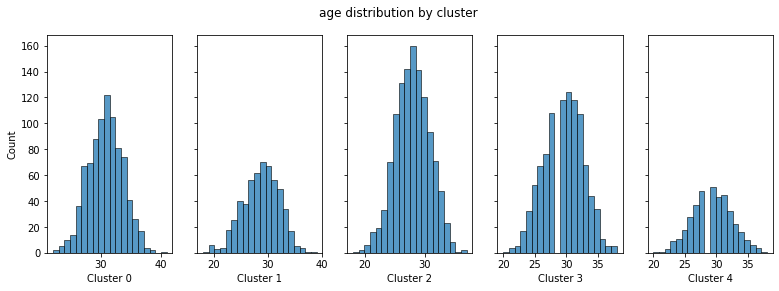

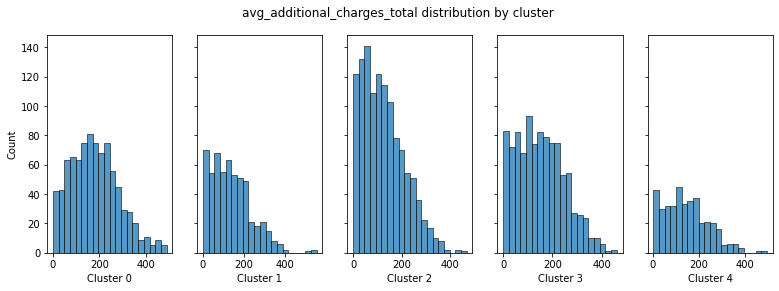

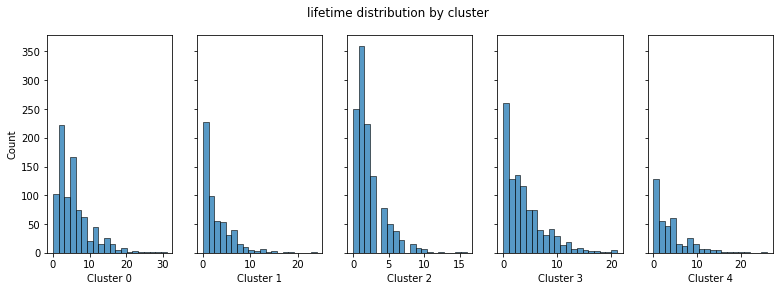

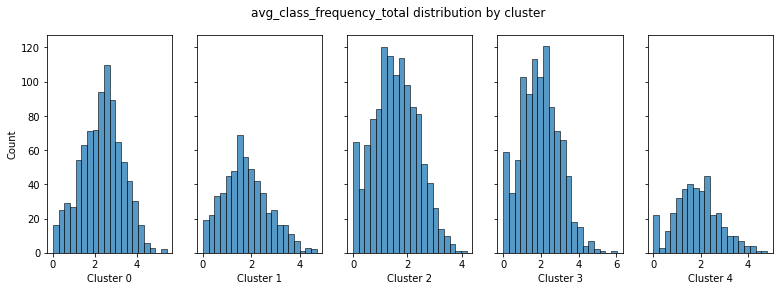

In [30]:
features = gym.drop(['churn', 'cluster_km'], axis=1).columns

for feature in features:
    fig, axes = plt.subplots(1, 5, sharey=True, figsize=(13, 4))
    
    for i, cluster in enumerate(range(5)):
        ax = axes[i]
        cluster_data = gym[gym['cluster_km'] == cluster]
        sns.histplot(data=cluster_data, x=feature, bins=20, ax=ax)
        ax.set_xlabel(f'Cluster {cluster}')
    
    fig.suptitle(' '.join([feature, 'distribution by cluster']));

These observations provide insights into the characteristics and behaviors of customers in each cluster:

- The gender distribution is fairly equal across all clusters.
- Cluster 1 consists of individuals who do not live near the gym, while the other clusters have varied proximity.
- Cluster 2 mainly includes individuals who do not work in a partner company, whereas other clusters show more diversity.
- Cluster 4 has a higher proportion of individuals who signed up through a friend compared to other clusters.
- Customers in all clusters left their phone contacts, indicating a normal behavior.
- Customers in all clusters exhibit diverse contract periods, with Cluster 2 customers are predominantly opting for a one-month period.
- Cluster 2 customers has a lower attendance rate in group sessions compared to other clusters.
- All clusters have customers' ages ranging from 22 to 37.
- Individuals across all clusters spend approximately $100-300 on additional gym features.
- Cluster 2 customers has a significantly lower lifetime value compared to other clusters.
- All clusters' customers have an average class frequency of around 3 classes.

### 3.6 Calculating the churn rate for each cluster

In [31]:
churn_rate = gym.groupby('cluster_km')['churn'].mean()
churn_rate = churn_rate.sort_values(ascending=False)
churn_rate

cluster_km
2    0.495812
1    0.402154
4    0.266839
3    0.131526
0    0.012687
Name: churn, dtype: float64

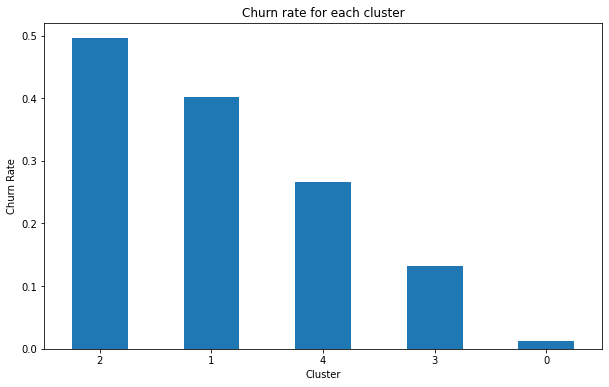

In [32]:
churn_rate.plot(kind='bar', figsize=(10,6), x='cluster_km', y='churn')
plt.xticks(rotation=0)
plt.title('Churn rate for each cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate');

When it comes to calculating the churn rate for each cluster, we can definitely see some differences. It helps us figure out which clusters have a higher chance of customers leaving and which ones are more loyal.

Here's the scoop on the churn rate results for each cluster:

- Cluster 2 takes the cake (or the protein shake) with a whopping churn rate of 49.58%! Looks like this cluster has a high likelihood of people leaving.

- Cluster 1 is not far behind, with a churn rate of 40.21%. That's quite a chunk of people considering leaving.

- Cluster 4 sits at a moderate churn rate of 26.68%. It's still higher than we'd like, but not as bad as the first two clusters.

- Now, here's the interesting part. Cluster 3 has a pretty low churn rate of 13.58%. Seems like they've got some loyal customers who stick around!

- Last but not least, we have Cluster 0 with an incredibly low churn rate of only 1.26%! These guys are super loyal.

Clusters 2 and 1 are more prone to people leaving, while Clusters 3 and 0 have some seriously loyal customers.

## 4. Conclusions and Recommendations

After digging into the data, we didn't spot any missing info or duplicates, but we made sure all column names were in lowercase for consistency.

We took a close look at the data to find outliers and relationships between variables. No major outliers caught our attention, but we did find some interesting correlations: 'avg_class_frequency_total' and 'avg_class_frequency_current_month,' as well as 'month_to_end_contract' and 'contract_period.'

Next, we trained and validated two models: Logistic Regression and Random Forest. Turns out, Logistic Regression performed a tad better than the other one.

When we grouped the users into clusters, we discovered that cluster 2 had the highest churn rate, while cluster 0 had the lowest. We noticed a few factors that set these clusters apart and potentially impact their churn rate:

1. Living Nearby: It seems that being close to the gym influenced whether a member stayed or left.
2. Partner Companies: Employees from partner companies were more likely to stick around.
3. Friends Promo: Members who joined through friends' recommendations tended to have higher retention.

Based on these findings, here are a few recommendations to improve customer interaction and retention:

1. Focus on partnerships with more companies to encourage their employees to join and stay longer at the gym.
2. Offer discounts and promotions for longer contract periods, enticing members to commit for a more extended period.
3. Introduce special contracts that give members a sneak peek of the gym's best-selling services or provide samples to spark their interest.
4. Increase the visibility of the gym by branding workout equipment, bags, and other merchandise.

Implementing these steps should help engage customers better and improve their retention at the gym.